In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as opt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

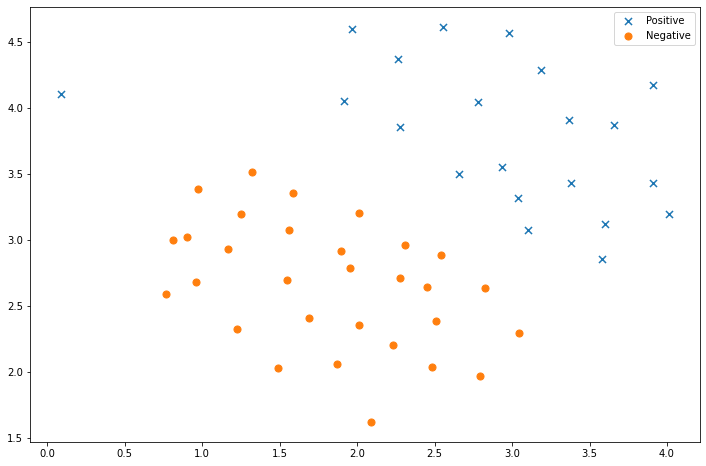

In [38]:
raw_data = sio.loadmat('data/ex6data1.mat')
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label = 'Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label = 'Negative')
ax.legend()
plt.show()

### Use package

In [39]:
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=10000)
svc

LinearSVC(C=1, loss='hinge', max_iter=10000)

In [40]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

In [41]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

D:\Python\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9411764705882353

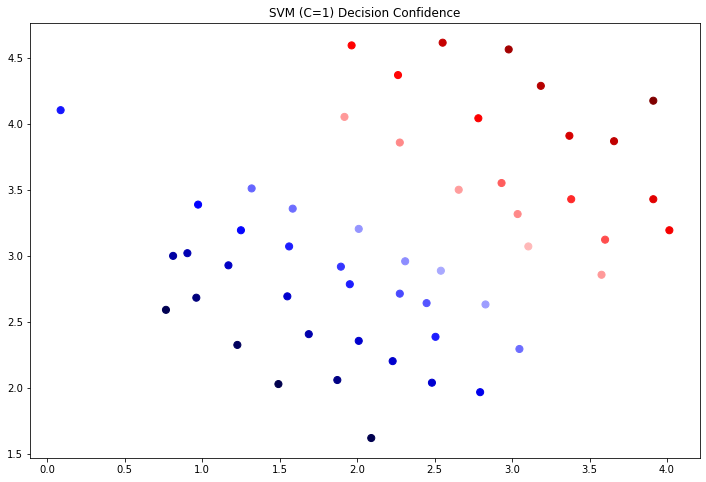

In [43]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

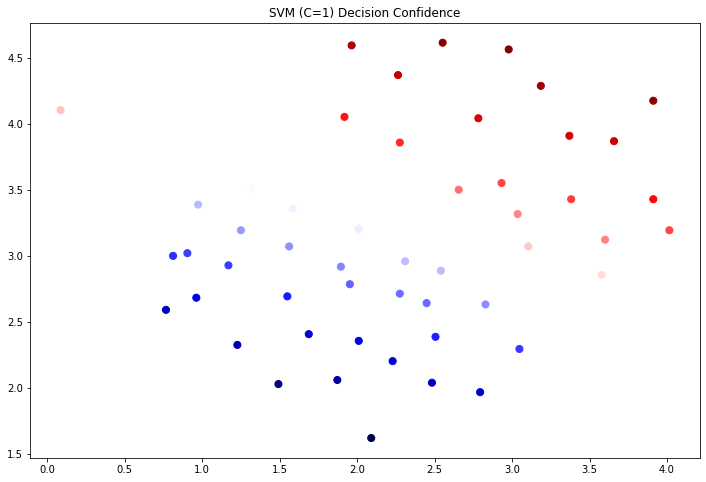

In [44]:
data['SVM 1 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

In [45]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [46]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

No handles with labels found to put in legend.


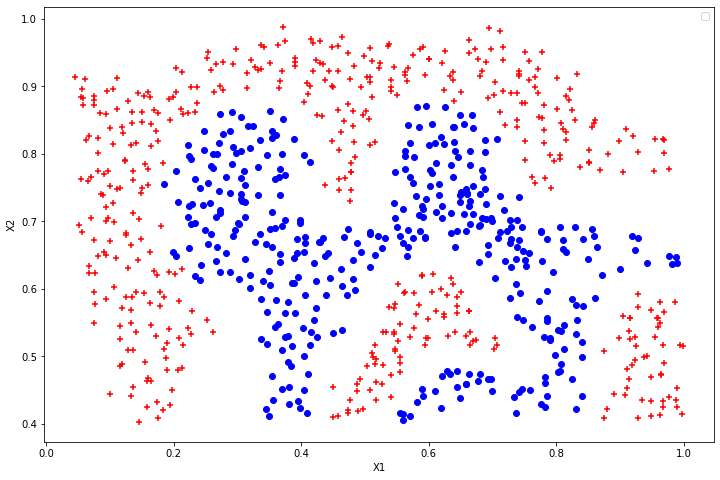

In [47]:
raw_data = sio.loadmat('data/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x=positive['X1'], y=positive['X2'], c='r', marker='+')
ax.scatter(x=negative['X1'], y=negative['X2'], c='b', marker='o')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.show()

In [53]:
svc = svm.SVC(C=100, gamma=10, max_iter=1000, probability=True)
svc

SVC(C=100, gamma=10, max_iter=1000, probability=True)

In [54]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

D:\Python\anaconda\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0.9640787949015064

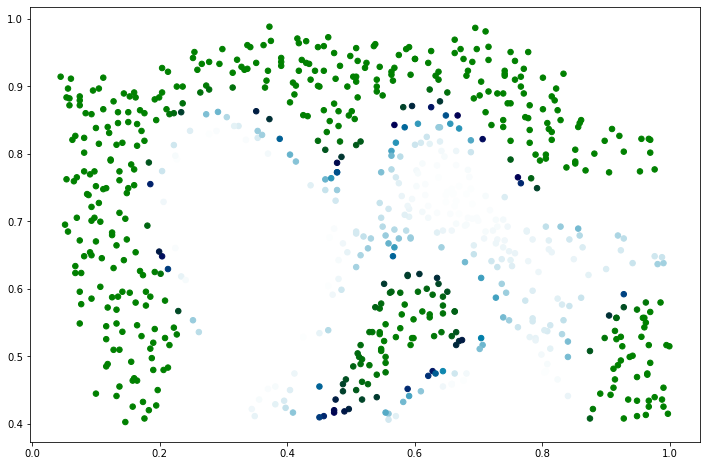

In [60]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:, 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='ocean')
plt.show()


In [61]:
raw_data = sio.loadmat('data/ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)

        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
best_params, best_score

({'C': 0.3, 'gamma': 100}, 0.965)

In [88]:
parameter = {'C':[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100], 'gamma':[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameter)
clf.fit(X, y)
ypred = clf.predict(Xval)

print(metrics.classification_report(yval, ypred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       113
           1       0.95      0.93      0.94        87

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [89]:
clf.best_estimator_

SVC(C=30, gamma=3)

In [90]:
clf.best_score_

0.9194905869324475